@author: Carlos Andrés Tejada Ramírez  
Point 2 of Homework 1 from statistics III

# Data Exploration AND PCA (Point 2)

## Use this data from the departments of Colombia to do the following tasks

Use the next data to calculate PCA and reduce the dimensionality from 2 dimensions to 1. For this exercise you must use the variables x_1, and x_2 and create a vector with a single dimension.

| Department                                       | GDP Millions (x_1) | Population (x_2) | GDP per capita Millions (x_3) |
|--------------------------------------------------|---------------------|-------------------|-------------------------------|
| Amazonas                                         | 1067855.672         | 76589             | 13.94267678                   |
| Antioquia                                        | 212514957.4         | 6407102           | 33.16865524                   |
| Arauca                                           | 8548114.653         | 262174            | 32.60473828                   |
| Atlántico                                        | 63764770.77         | 2535517           | 25.1486268                    |
| Bogotá D.C.                                      | 357258620.8         | 7412566           | 48.19634938                   |
| Bolívar                                          | 51404352.37         | 2070110           | 24.83170091                   |
| Boyacá                                           | 38858162.12         | 1217376           | 31.91960588                   |
| Caldas                                           | 23953112.45         | 998255            | 23.9949837                    |
| Caquetá                                          | 5461366.78          | 401849            | 13.59059443                   |
| Casanare                                         | 23660657.37         | 420504            | 56.26737766                   |
| Cauca                                            | 25758151.71         | 1464488           | 17.58850309                   |
| Cesar                                            | 37523918.98         | 1200574           | 31.25498218                   |
| Chocó                                            | 6001844.915         | 534826            | 11.2220515                    |
| Córdoba                                          | 24991953.76         | 1784783           | 14.00279685                   |
| Cundinamarca                                     | 91945942.28         | 2919060           | 31.49847632                   |
| Guainía                                          | 497704.0127         | 48114             | 10.34426597                   |
| Guaviare                                         | 1123857.696         | 82767             | 13.57857232                   |
| Huila                                            | 24011616.06         | 1100386           | 21.8210846                    |
| La Guajira                                       | 22262575.88         | 880560            | 25.28229295                   |
| Magdalena                                        | 19738417.36         | 1341746           | 14.710994                     |
| Meta                                             | 58439500.07         | 1039722           | 56.20685151                   |
| Nariño                                           | 21775426.15         | 1630592           | 13.35430699                   |
| Norte de Santander                               | 23056874.23         | 1491689           | 15.45689097                   |
| Putumayo                                          | 5616558.269         | 348182            | 16.13109888                   |
| Quindío                                          | 11941644.16         | 539904            | 22.11808795                   |
| Risaralda                                        | 23786362.42         | 943401            | 25.21341659                   |
| San   Andrés, Providencia y Santa Catalina (Archipiélago) | 2125410.333 | 61280             | 34.68358898                   |
| Santander                                        | 92276678.16         | 2184837           | 42.23504003                   |
| Sucre                                            | 11516270.76         | 904863            | 12.7270877                    |
| Tolima                                           | 30438180.15         | 1330187           | 22.8826324                    |
| Valle del Cauca                                  | 139863153.5         | 4475886           | 31.2481492                    |
| Vaupés                                           | 381851.6785         | 40797             | 9.359797989                   |
| Vichada                                          | 956576.6785         | 107808            | 8.872965629                   |
>

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df = pd.read_csv("../Docs/Data/DEPARTMENTS.csv")

In [5]:
columnx_1 = df['GDP Millions (x_1)']
columnx_2 = df['Population (x_2)']
columnx_3 = df['GDP per capita Millions (x_3)']
column_department = df['Department']

#df.describe()

### Let's reuse some methods from point 1

In [6]:
def calculateMean(column):
    return column.sum() / len(column)

def calculateStdDev(column, mean):
    n = len(column)
    squaredDifferences = [(x - mean) ** 2 for x in column]
    variance = sum(squaredDifferences) / n
    stdDev = variance ** 0.5
    return stdDev

def calculateCovariance(columnX, columnY):
    columnLength = len(columnX)

    if columnLength != len(columnY):
        raise ValueError("Columns must have the same length")

    meanX = calculateMean(columnX)
    meanY = calculateMean(columnY)

    return sum((columnX[i] - meanX) * (columnY[i] - meanY) for i in range(columnLength)) / columnLength

def scaleData(data):
    scaledData = data.copy()
    for column in data.columns:
        mean = calculateMean(data[column])
        standardDeviation = calculateStdDev(data[column], mean)
        scaledData[column] = (data[column] - mean) / standardDeviation
    return scaledData

In [9]:
def calculateCovarianceMatrix(data):
    numFeatures = len(data.columns)
    covarianceMatrix = np.zeros((numFeatures, numFeatures))

    for i in range(numFeatures):
        for j in range(numFeatures):
            covarianceMatrix[i, j] = calculateCovariance(data.iloc[:, i], data.iloc[:, j])

    return covarianceMatrix

def reduceDimensionalityPCA(data):
    scaledData = scaleData(data)

    # Calculate covariance matrix
    covarianceMatrix = calculateCovarianceMatrix(scaledData)

    # Manual computation of eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covarianceMatrix)

    # Manual sorting of eigenvalues and eigenvectors
    sortedIndex = np.argsort(eigenvalues)[::-1]
    sortedEigenvalues = eigenvalues[sortedIndex]
    sortedEigenvectors = eigenvectors[:, sortedIndex]

    # Manual selection of the principal component
    principalComponent = sortedEigenvectors[:, 0]

    # Adjust the sign of the principal component
    if principalComponent[0] < 0:
        principalComponent = -principalComponent

    # Manual projection of the data onto the principal component
    reducedData = np.dot(scaledData, principalComponent)

    return reducedData, covarianceMatrix, sortedEigenvalues, sortedEigenvectors, principalComponent

# Example usage
data = pd.DataFrame({'columnx_1': columnx_1, 'columnx_2': columnx_2})
reducedData, covarianceMatrix, sortedEigenvalues, sortedEigenvectors, principalComponent = reduceDimensionalityPCA(data)

# Calculate explained variance by each eigenvalue
explainedVariance = sortedEigenvalues / np.sum(sortedEigenvalues)

# Calculate error or difference between the projected and original data
error = np.linalg.norm(data.values - np.outer(reducedData, principalComponent))

In [10]:
point2 = {
    1: covarianceMatrix,
    2: sortedEigenvalues,
    3: explainedVariance,
    4: principalComponent,
    5: reducedData,
    6: error
}

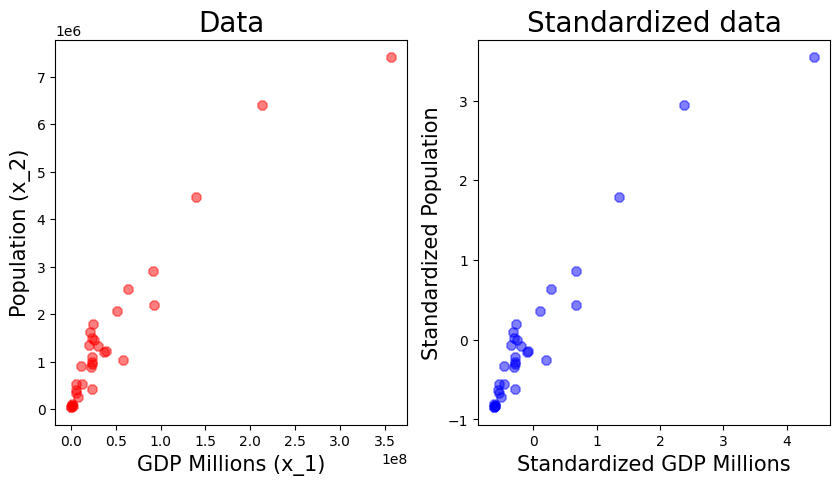

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title("Data", fontsize=20)
ax1.scatter(columnx_1, columnx_2, marker="8", s=50, color="red", alpha=0.5)
ax1.set_xlabel("GDP Millions (x_1)", fontsize=15)
ax1.set_ylabel("Population (x_2)", fontsize=15)

columns = ["GDP Millions (x_1)", "Population (x_2)"]
data = df[columns]
dataScaled = pd.DataFrame(StandardScaler().fit_transform(data), columns=columns)

ax2.set_title("Standardized data", fontsize=20)
ax2.scatter(dataScaled["GDP Millions (x_1)"], dataScaled["Population (x_2)"], marker="8", s=50, color="blue", alpha=0.5)
ax2.set_xlabel("Standardized GDP Millions", fontsize=15)
ax2.set_ylabel("Standardized Population", fontsize=15)

plt.show()

## 1. What is the covariance matrix

In [136]:
print(pd.DataFrame(point2[1], columns=data.columns, index=data.columns))


           columnx_1  columnx_2
columnx_1    1.00000    0.95525
columnx_2    0.95525    1.00000


## 2. What are the eigenvalues

In [137]:
print(pd.DataFrame(point2[2], columns=["Eigenvalues"]))

   Eigenvalues
0      1.95525
1      0.04475


## 3. What is the variance explained by the eigenvalue.

In [138]:
print(pd.DataFrame(point2[3], columns=["Variance explained by eigenvalue"]))

   Variance explained by eigenvalue
0                          0.977625
1                          0.022375


## 4. What is the value of the eigenvector

In [139]:
print(pd.DataFrame(point2[4], columns=["Eigenvector"]))

   Eigenvector
0     0.707107
1     0.707107


## 5. What is the projected vector.

In [40]:
from sklearn.decomposition import PCA

pca = PCA()
pcaResult = pca.fit_transform(scaleData(data))
print(pd.DataFrame(np.hstack([reducedData.reshape(-1, 1), pcaResult[:, 0].reshape(-1, 1)]), index=column_department, columns=["Manual", "sklearn"]))

                                                      Manual   sklearn
Department                                                            
Amazonas                                           -1.016761 -1.016761
Antioquia                                           3.766923  3.766923
Arauca                                             -0.863684 -0.863684
Atlántico                                           0.646634  0.646634
Bogotá D.C.                                         5.640378  5.640378
Bolívar                                             0.326854  0.326854
Boyacá                                             -0.157860 -0.157860
Caldas                                             -0.399442 -0.399442
Caquetá                                            -0.835803 -0.835803
Casanare                                           -0.645617 -0.645617
Cauca                                              -0.185065 -0.185065
Cesar                                              -0.178301 -0.178301
Chocó 

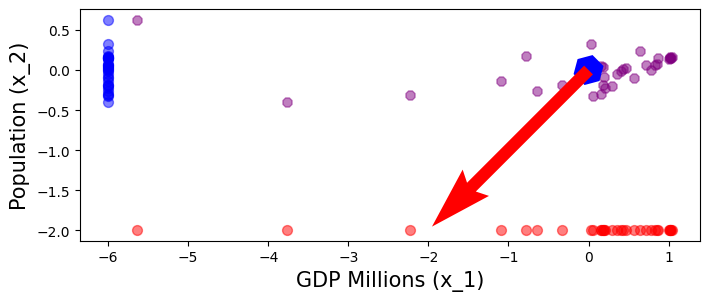

In [43]:
dataScaled = pd.DataFrame(StandardScaler().fit_transform(data), columns=columns)
eigenvalues, eigenvectors = np.linalg.eig(covarianceMatrix)

vectorA = eigenvectors[:, 0]
vectorB = eigenvectors[:, 1]

projection = pd.DataFrame(dataScaled.values @ eigenvectors.T,
                          columns=["GDP Millions (x_1)", "Population (x_2)"])

plt.figure(figsize=(8, 8))
plt.axes().set_aspect("equal")

plt.scatter(projection["GDP Millions (x_1)"], projection["Population (x_2)"],
            marker="8", s=50, color="purple", alpha=0.5)

plt.quiver(0, 0,
           vectorA[0] / abs(vectorA[0]) * eigenvalues[0],
           vectorA[1] / abs(vectorA[1]) * eigenvalues[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.05)

plt.quiver(0, 0,
           vectorB[0] / abs(vectorB[0]) * eigenvalues[1],
           vectorB[1] / abs(vectorB[1]) * eigenvalues[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02)

plt.scatter(projection["GDP Millions (x_1)"], [-2] * len(projection["GDP Millions (x_1)"]),
            s=50, color="red", alpha=0.5)

plt.scatter([-6] * len(projection["Population (x_2)"]), projection["Population (x_2)"],
            s=50, color="blue", alpha=0.5)

plt.xlabel("GDP Millions (x_1)", fontsize=15)
plt.ylabel("Population (x_2)", fontsize=15)
plt.show()


## 6. What is the error or difference between the projected matrix

In [42]:
error =  np.linalg.norm(data.values - np.outer(reducedData, principalComponent))
print("Manual PCA error:", error)
error = np.linalg.norm(data.values - pca.inverse_transform(pcaResult), ord='fro')
print("scikit-learn PCA error:", error)

Manual PCA error: 478923461.57698685
scikit-learn PCA error: 478923461.4655835
